In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import calculate_observables as obs

In [2]:
base_path = "../reconstructions/SM_spin-ON_100k"

top_batches = list()
tbar_batches = list()
for batch_idx in range(10):
    start_idx = batch_idx * 10000
    end_idx = start_idx + 10000
    top_batches.append(np.load(os.path.join(base_path, f"p_top_batch_{batch_idx}.npy")))
    tbar_batches.append(np.load(os.path.join(base_path, f"p_tbar_batch_{batch_idx}.npy")))
    
p_top = np.concatenate(top_batches, axis=0)
p_tbar = np.concatenate(tbar_batches, axis=0)

In [3]:
base_path = "../reconstructions/SM_spin-ON_100k"

l_t_batches = list()
l_tbar_batches = list()
for batch_idx in range(10):
    start_idx = batch_idx * 10000
    end_idx = start_idx + 10000
    l_t_batches.append(np.load(os.path.join(base_path, f"p_l_t_batch_{batch_idx}.npy")))
    l_tbar_batches.append(np.load(os.path.join(base_path, f"p_l_tbar_batch_{batch_idx}.npy")))
    
p_l_t = np.concatenate(l_t_batches, axis=0)
p_l_tbar = np.concatenate(l_tbar_batches, axis=0)

In [4]:
obs_dict = obs.obs_matrix(p_l_t, p_l_tbar, p_top, p_tbar)

## Plots

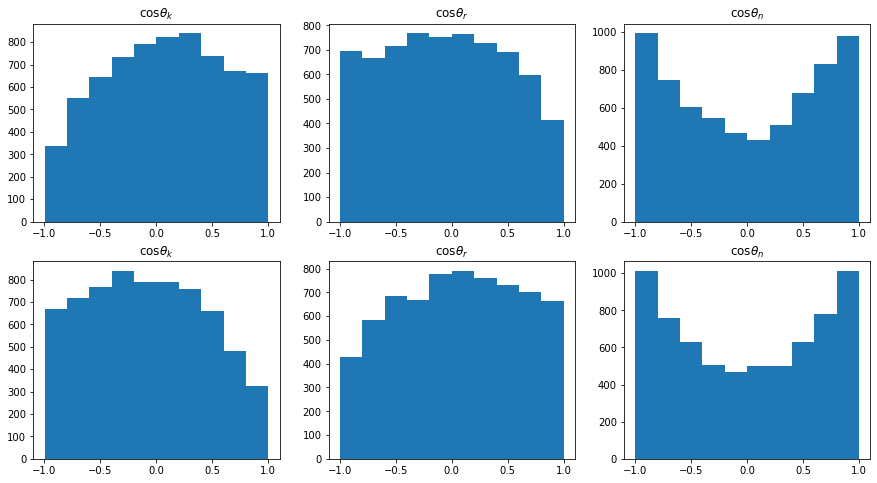

In [5]:
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)
for i in range(2):
    ax[i, 0].hist(obs_dict[f"cos_k{i + 1}"])
    ax[i, 0].set_title(r"$\cos \theta_k$")
    ax[i, 1].hist(obs_dict[f"cos_r{i + 1}"])
    ax[i, 1].set_title(r"$\cos \theta_r$")
    ax[i, 2].hist(obs_dict[f"cos_n{i + 1}"])
    ax[i, 2].set_title(r"$\cos \theta_n$")